In [1]:
# Access through Google Drive - Please add a shortcut to My Drive
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
file_path  = "/content/drive/My Drive/WQD7003/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Multi-model-based prediction of COVID-19 data**


In [2]:
# import package list
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Understanding**

This dataset contains over 1 million anonymized patient records with 21 features, focusing on COVID-19 outcomes, medical care, and pre-existing conditions. Key insights include demographic details, care intensity, and health risk factors. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.


*   sex: 1 for female and 2 for male.
*   age: of the patient.
*   classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
*   patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
pneumonia: whether the patient already have air sacs inflammation or not.
*   pregnancy: whether the patient is pregnant or not.
*   diabetes: whether the patient has diabetes or not.
*   copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
*   asthma: whether the patient has asthma or not.
*   inmsupr: whether the patient is immunosuppressed or not.
*   hypertension: whether the patient has hypertension or not.
*   cardiovascular: whether the patient has heart or blood vessels related disease.
*   renal chronic: whether the patient has chronic renal disease or not.
*   other disease: whether the patient has other disease or not.
*   obesity: whether the patient is obese or not.
*   tobacco: whether the patient is a tobacco user.
*   usmr: Indicates whether the patient treated medical units of the first, second or third level.
*   medical unit: type of institution of the National Health System that provided the care.
*   intubed: whether the patient was connected to the ventilator.
*   icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
*   date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

Data Source: Data souce: https://www.kaggle.com/datasets/meirnizri/covid19-dataset/data
(The dataset was provided by the Mexican government.)

In [3]:
# https://www.kaggle.com/code/yasirakyzl/covid-19-ml-model-90-accuracy/notebook
import pandas as pd
df = pd.read_csv(file_path+"Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.shape

(1048575, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [7]:
df.isnull().sum()
# We have no NaN values but we will have missing values.

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


The dataset contains no explicit NaN values across any columns, However, there are likely encoded missing values that need to be identified and handled separately for accurate data processing and analysis.

In [8]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [9]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION','OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO','INTUBED','ICU']
value_counts_dict = {col: df[col].value_counts() for col in cols}
for col, counts in value_counts_dict.items():
    print(f"Value counts for {col}:\n{counts}\n")

Value counts for PNEUMONIA:
PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

Value counts for DIABETES:
DIABETES
2     920248
1     124989
98      3338
Name: count, dtype: int64

Value counts for COPD:
COPD
2     1030510
1       15062
98       3003
Name: count, dtype: int64

Value counts for ASTHMA:
ASTHMA
2     1014024
1       31572
98       2979
Name: count, dtype: int64

Value counts for INMSUPR:
INMSUPR
2     1031001
1       14170
98       3404
Name: count, dtype: int64

Value counts for HIPERTENSION:
HIPERTENSION
2     882742
1     162729
98      3104
Name: count, dtype: int64

Value counts for OTHER_DISEASE:
OTHER_DISEASE
2     1015490
1       28040
98       5045
Name: count, dtype: int64

Value counts for CARDIOVASCULAR:
CARDIOVASCULAR
2     1024730
1       20769
98       3076
Name: count, dtype: int64

Value counts for OBESITY:
OBESITY
2     885727
1     159816
98      3032
Name: count, dtype: int64

Value counts for RENAL_CHRONIC:
RENAL_CHRONIC
2    

In [10]:
df.DATE_DIED.value_counts()

,count
DATE_DIED,
9999-99-99,971633
06/07/2020,1000
07/07/2020,996
13/07/2020,990
16/06/2020,979
...,...
01/01/2021,1
30/12/2020,1
10/01/2021,1


**INFERENCE:**

1.  Handling Missing Values: Some features are expected to have only two unique values but instead have three or four. For example, the "PNEUMONIA" feature has three unique values (1, 2, 99), where 99 represents missing values. Hence, we will just take the rows that includes 1 and 2 values.

2. Dropping Columns: The "INTUBED" and "ICU" features have excessive missing values, so these columns will be dropped.

3. Creating the "DEATH" Feature: In the "DATE_DIED" column, there are 971,633 entries with the value "9999-99-99," which indicates alive patients. This column is transformed into a "DEATH" feature that signifies whether a patient has died or not.

In [11]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

**Objective**
1. To analyze and identify the most influential features (e.g., age, pneumonia, patient type, comorbidities) that affect patient outcomes, including hospitalization and death.
2. To develop and compare the performance of multiple machine learning models in predicting critical COVID-19 patient outcomes, such as hospitalization risk and mortality.
3. To develop predictive tools and actionable insights that empower businesses, healthcare institutions, and communities to better allocate resources and respond effectively to future pandemics or similar health crises.

# **Data Preparation**

In [12]:
# 1. Handling Missing Values: Some features are expected to have only two unique values but instead have three or four.
# For example, the "PNEUMONIA" feature has three unique values (1, 2, 99), where 99 represents missing values. Hence, we will just take the rows that includes 1 and 2 values.
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION',
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    df = df[(df[col] == 1)|(df[col] == 2)]
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [13]:
# 2. Dropping Columns: The "INTUBED" and "ICU" features have excessive missing values, so these columns will be dropped.
df.drop(columns=['INTUBED','ICU'], inplace=True)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,97,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,97,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,97,1,2,2,2,1,2,2,2,2,2,3


In [14]:
# 3. Creating the "DEATH" Feature: In the "DATE_DIED" column, there are 971,633 entries with the value "9999-99-99," which indicates alive patients.
# This column is transformed into a "DEATH" feature that signifies whether a patient has died or not. 1:died, 2: survived
df['DEATH'] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]
df['DEATH'].value_counts()

,count
DEATH,
2,950438
1,74714


In [15]:
df.drop(columns=['DATE_DIED'], inplace=True)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,97,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,97,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,97,1,2,2,2,1,2,2,2,2,2,3,1


In [16]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


In [17]:
print('MALE',df.query('SEX==2')['PREGNANT'].value_counts(), sep='\n')
print('\n')
print('FEMALE',df.query('SEX==1')['PREGNANT'].value_counts(), sep='\n')

MALE
PREGNANT
97    511936
Name: count, dtype: int64


FEMALE
PREGNANT
2     502200
1       7841
98      3175
Name: count, dtype: int64


1. Male Data: The value 97 is exclusively observed for males in the "PREGNANT" feature, which is invalid as males cannot be pregnant. Therefore, all instances of 97 will be converted to 2 (representing "not pregnant").
2. Female Data: only rows with values 1 (pregnant) and 2 (not pregnant) will be retained, while other invalid values like 98 will be excluded from the dataset.

In [18]:
# 1. Male Data: The value 97 is exclusively observed for males in the "PREGNANT" feature, which is invalid as males cannot be pregnant. Therefore, all instances of 97 will be converted to 2 (representing "not pregnant").
df.PREGNANT = df.PREGNANT.replace(97,2)

# 2. Female Data: only rows with values 1 (pregnant) and 2 (not pregnant) will be retained, while other invalid values like 98 will be excluded from the dataset.
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

In [19]:
df['PREGNANT'].value_counts()

,count
PREGNANT,
2,1014136
1,7841


In [20]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


In [21]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1021977 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1021977 non-null  int64
 1   MEDICAL_UNIT          1021977 non-null  int64
 2   SEX                   1021977 non-null  int64
 3   PATIENT_TYPE          1021977 non-null  int64
 4   PNEUMONIA             1021977 non-null  int64
 5   AGE                   1021977 non-null  int64
 6   PREGNANT              1021977 non-null  int64
 7   DIABETES              1021977 non-null  int64
 8   COPD                  1021977 non-null  int64
 9   ASTHMA                1021977 non-null  int64
 10  INMSUPR               1021977 non-null  int64
 11  HIPERTENSION          1021977 non-null  int64
 12  OTHER_DISEASE         1021977 non-null  int64
 13  CARDIOVASCULAR        1021977 non-null  int64
 14  OBESITY               1021977 non-null  int64
 15  RENAL_CHRONIC       

(1021977, 19)

# **Data Visualization**

## 1. Heatmap: Correlation Between Features

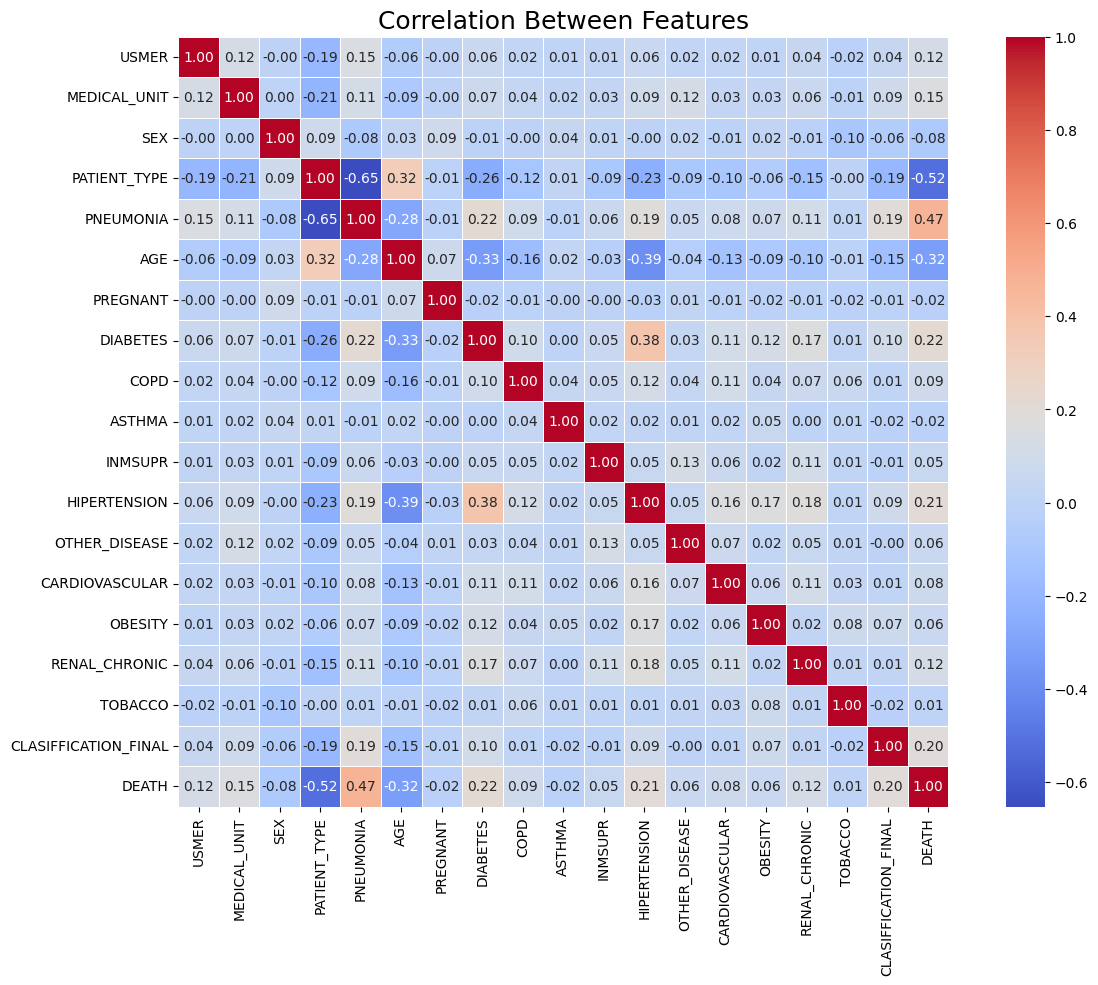

In [22]:
# 1. Heatmap: Correlation Between Features
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Between Features", fontsize=18)
plt.show()

In [23]:
correlation_with_death = df.corr()['DEATH'].sort_values(ascending=False)
print(correlation_with_death)

DEATH                   1.000000
PNEUMONIA               0.470891
DIABETES                0.217124
HIPERTENSION            0.205166
CLASIFFICATION_FINAL    0.197643
MEDICAL_UNIT            0.154430
RENAL_CHRONIC           0.119417
USMER                   0.118942
COPD                    0.089750
CARDIOVASCULAR          0.076546
OTHER_DISEASE           0.057156
OBESITY                 0.056430
INMSUPR                 0.049284
TOBACCO                 0.005154
ASTHMA                 -0.017303
PREGNANT               -0.021065
SEX                    -0.080389
AGE                    -0.322696
PATIENT_TYPE           -0.520156
Name: DEATH, dtype: float64



The correlation heatmap shows that PNEUMONIA (0.47), PATIENT_TYPE (-0.52), and AGE (-0.32) are the most significant factors correlated with DEATH. Features like DIABETES (0.22) and HYPERTENSION (0.21) have moderate relevance, while others such as ASTHMA and TOBACCO exhibit negligible impact on mortality. This analysis guides feature selection by prioritizing impactful variables for predictive modeling.

## 2. Distribution Plots: Age Distirbution by Death Status

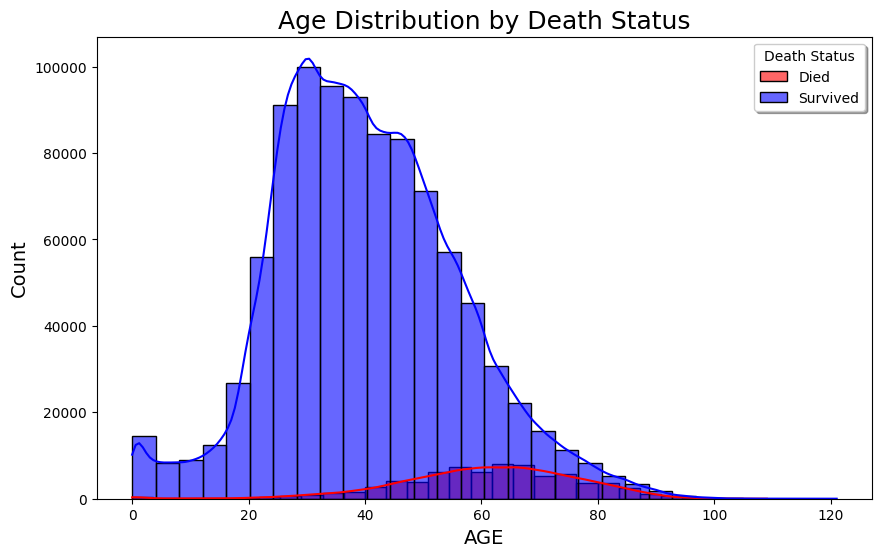

In [24]:
# 2. Distribution Plots: Age Distirbution
plt.figure(figsize=(10, 6))
for death_status in df['DEATH'].unique():
    label = 'Died' if death_status == 1 else 'Survived'
    color = 'red' if death_status == 1 else 'blue'
    sns.histplot(data=df[df['DEATH'] == death_status], x='AGE', bins=30, kde=True, label=label, color=color, alpha=0.6)
plt.title('Age Distribution by Death Status', fontsize=18)
plt.xlabel('AGE', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Death Status',frameon=True,shadow=True)
plt.show()

The age distribution shows that most individuals are aged between 20 and 60, with a peak around 30–40 years. Among those who died, a notable proportion is in the older age group, emphasizing age as a critical factor influencing survival outcomes.

## 3. Bar Chart: Distribution of DEATH by Key Features

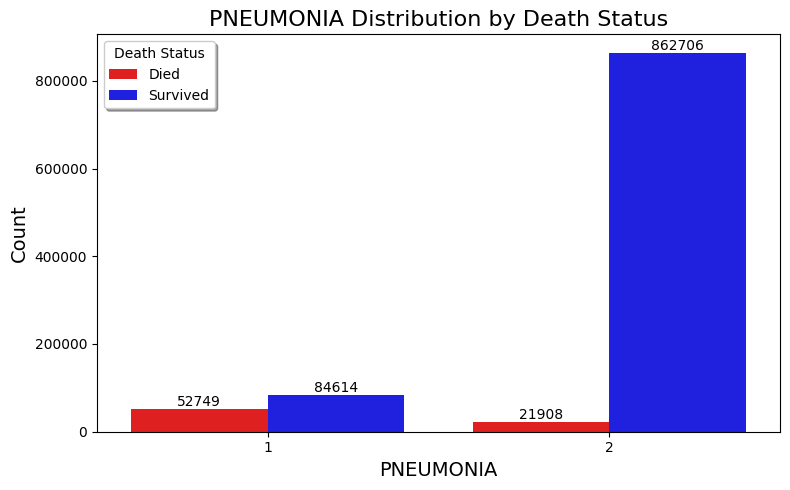

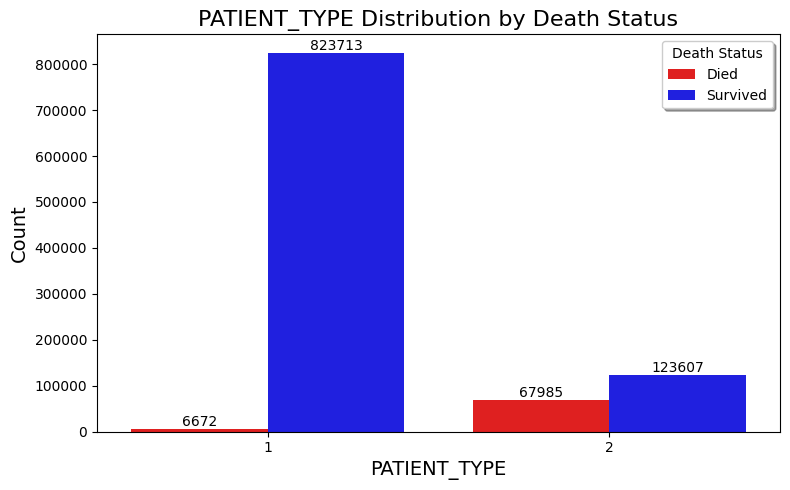

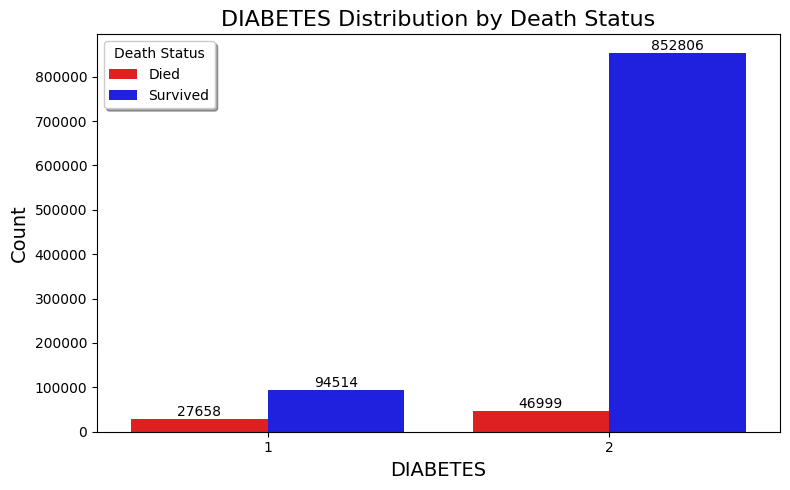

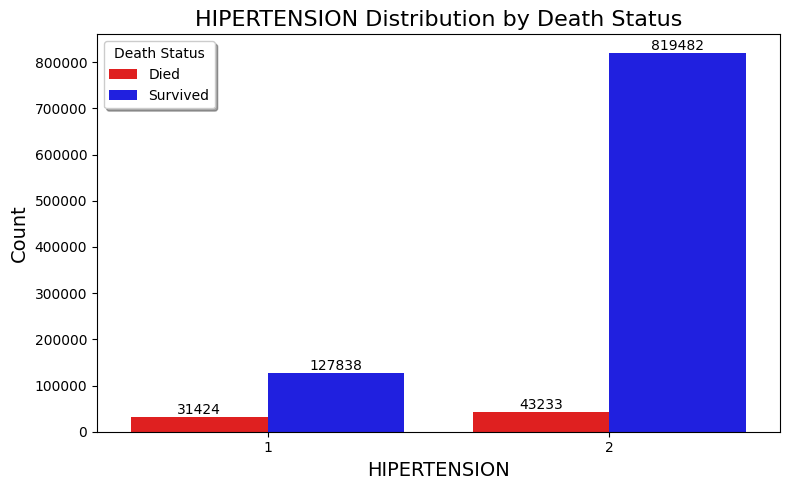

In [25]:
# 3. Bar Chart: Distribution of DEATH by Key Features
features = ['PNEUMONIA', 'PATIENT_TYPE', 'DIABETES', 'HIPERTENSION']
for feature in features:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=feature, hue='DEATH', palette={1: 'red', 2: 'blue'}, hue_order=[1, 2])
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10, color='black')
    plt.title(f'{feature} Distribution by Death Status', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Death Status', labels=['Died', 'Survived'], loc='best',frameon=True,shadow=True)
    plt.tight_layout()
    plt.show()




1.   PNEUMONIA Distribution by Death Status: Patients with pneumonia (PNEUMONIA=1) show a significant proportion of deaths (52,749 died vs. 84,614 survived). However, most patients without pneumonia (PNEUMONIA=2) survived (86,2706 survived vs. 21,908 died), indicating a higher survival rate among those without pneumonia.

2.   PATIENT_TYPE Distribution by Death Status: Hospitalized patients (PATIENT_TYPE=1) exhibit a significant survival rate (823,713 survived), but a non-negligible number of deaths (6,672 died). Outpatients (PATIENT_TYPE=2) also show higher survival (123,607 survived) with a smaller fraction of deaths (67,985 died).

3.   DIABETES Distribution by Death Status: Patients with diabetes (DIABETES=1) show a higher death count (27,658) compared to survivors (94,514), while non-diabetic patients (DIABETES=2) have a much higher survival rate (852,806) and fewer deaths (46,999). This highlights diabetes as a significant risk factor for mortality.


4.   Hypertension is more prevalent among individuals who survived (HIPERTENSION = 2), with 819,482 cases compared to 127,838 cases for those with hypertension (HIPERTENSION = 1). However, a notable number of deaths (DEATH = 1) are also associated with hypertension, particularly for HIPERTENSION = 1, where there are 31,424 deaths. This highlights that while hypertension is common in survivors, it still has a significant presence in fatal cases.

## 4. Box Plot: Age Distribution by Death Status and Sex

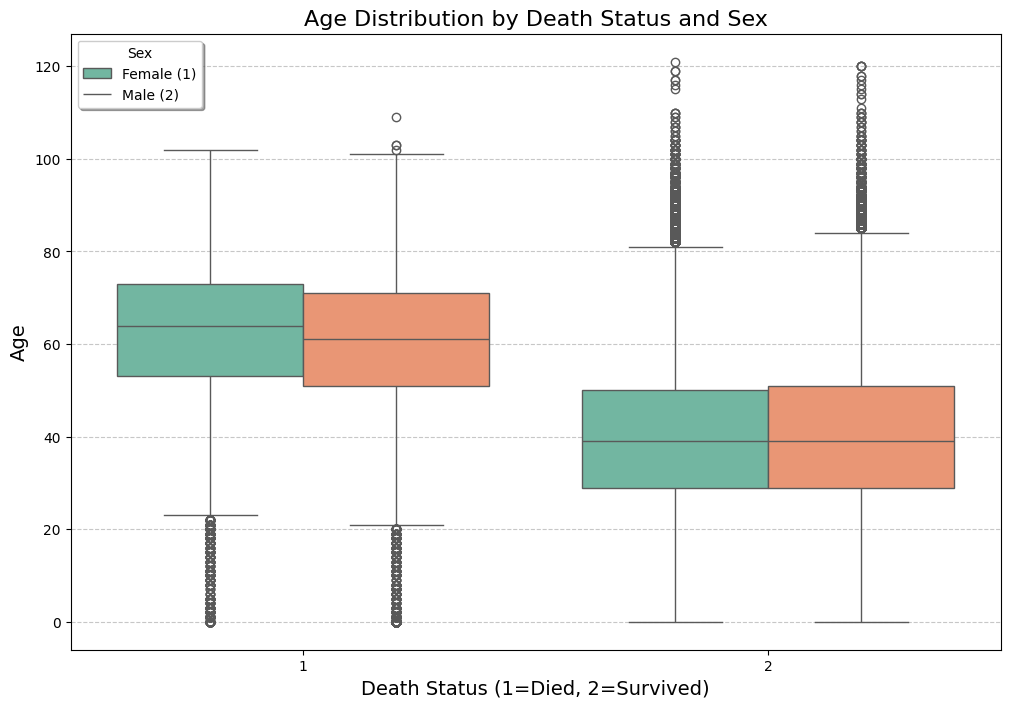

In [26]:
# 4. Box Plot: Age Distribution by Death Status and Sex
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='DEATH', y='AGE', hue='SEX', palette='Set2')
plt.title('Age Distribution by Death Status and Sex', fontsize=16)
plt.xlabel('Death Status (1=Died, 2=Survived)', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Sex', labels=['Female (1)', 'Male (2)'], loc='upper left',frameon=True,shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The box plot shows that individuals who died (DEATH=1) tend to have a higher median age compared to survivors (DEATH=2). Additionally, males in the deceased group generally show a slightly higher age range than females, emphasizing the influence of both age and gender on death outcomes. Survivors display a broader and more evenly distributed age range.

## 5. Pie Chart: Death Distribution

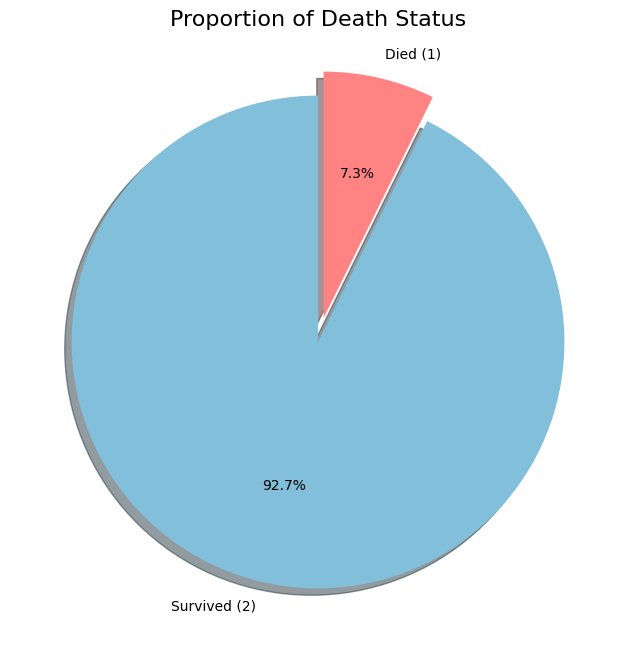

In [27]:
# 5. Pie Chart: Death Distribution
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
death_counts = df['DEATH'].value_counts()
labels = ['Survived (2)', 'Died (1)']
sizes = [death_counts[2], death_counts[1]]
explode = (0, 0.1)
colors = ['#81BFDA', '#FF8383']

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    shadow=True
)
plt.title('Proportion of Death Status', fontsize=16)
plt.show()

The pie chart shows that 92.7% of individuals survived (2), while only 7.3% died (1). This highlights a significant class imbalance in the dataset, which may influence predictive modeling and require adjustments to address this imbalance.

## 6. Violin Plot for 'AGE' by 'SEX' and 'DEATH'

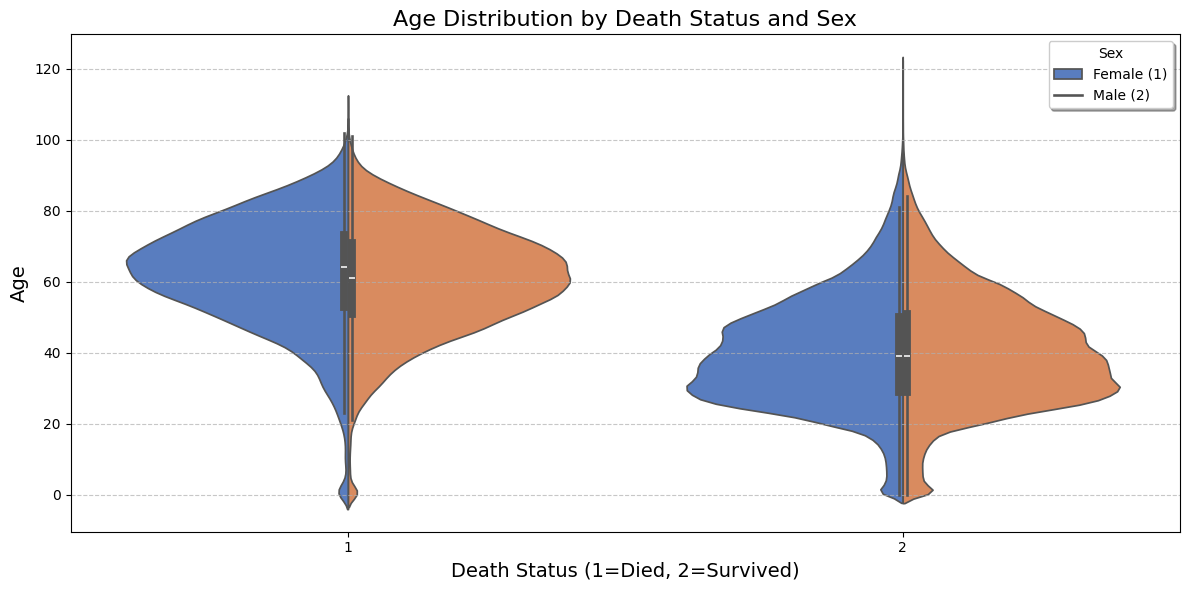

In [28]:
# 6. Violin Plot for 'AGE' by 'SEX' and 'DEATH'
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='DEATH', y='AGE', hue='SEX', split=True, palette='muted')
plt.title('Age Distribution by Death Status and Sex', fontsize=16)
plt.xlabel('Death Status (1=Died, 2=Survived)', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Sex', labels=['Female (1)', 'Male (2)'], loc='upper right',frameon=True,shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The violin plot reveals that individuals who died (DEATH=1) are generally older, with males showing slightly higher age distributions than females. Survivors (DEATH=2) have a more even age range, with no significant gender differences. This highlights the combined impact of age and gender on mortality outcomes.

# **Machine Learning Modelling**

## **Data Preprocessing with RandomUnderSampler**


This step preprocesses the dataset to address class imbalance and prepare it for model training:

1.   Feature Normalization: The AGE feature is standardized using StandardScaler to ensure all features are on the same scale, which prevents any single feature from dominating the model.
2.   Feature and Target Separation: The dataset is divided into independent features (x) and the target variable (y), with DEATH serving as the target.
3.   Data Balancing with RandomUnderSampler:
  *   RandomUnderSampler reduces the size of the majority class (e.g., survivors) by randomly removing samples to balance the dataset.
  *   This technique ensures equal representation of classes while maintaining critical patterns.
4.   Dataset Splitting: The balanced dataset is split into training and testing sets with an 80-20 ratio. This allows the model to train on balanced data and evaluate its performance on unseen data.

This ensures the dataset becomes balanced, enabling the model to better predict minority class outcomes (e.g., patient deaths) and reducing bias.

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize AGE
scaler = StandardScaler()
df['AGE'] = scaler.fit_transform(df[['AGE']])

# Define features and target variable
y = df['DEATH']
x = df.drop('DEATH', axis=1)

# Balance dataset using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

# Split the resampled dataset
train_x, test_x, train_y, test_y = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


<ipython-input-64-42fe016ee702>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette=['red', 'blue'])


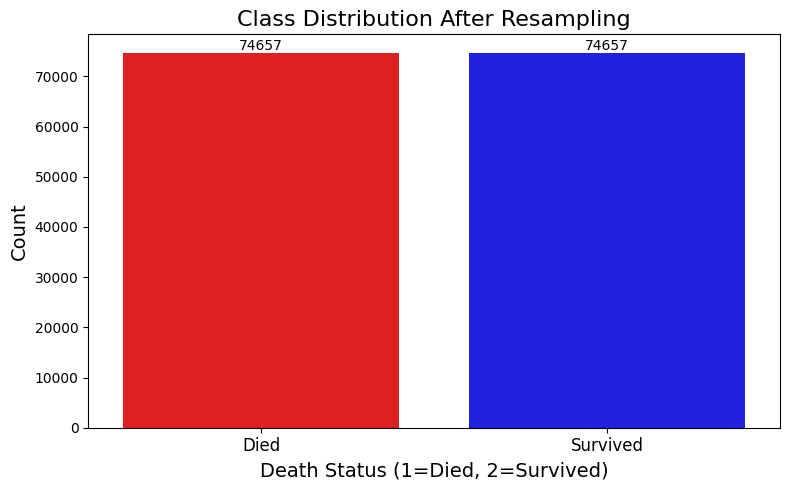

In [64]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Count class distribution
class_counts = Counter(y_resampled)

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette=['red', 'blue'])

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

# Set titles and labels
plt.title('Class Distribution After Resampling', fontsize=16)
plt.xlabel('Death Status (1=Died, 2=Survived)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], labels=['Died', 'Survived'], fontsize=12)

# Final layout adjustments
plt.tight_layout()
plt.show()


After applying RandomUnderSampler, the dataset is balanced with 74,657 samples for both Died (1) and Survived (2). This technique randomly reduces the majority class size, ensuring fair representation of both classes. By achieving this balance, the process mitigates bias and enhances model performance, particularly for predicting critical outcomes like death.

In [66]:
import joblib

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data (all 12 features)
# This ensures the scaler learns the mean and standard deviation of each feature
train_x = scaler.fit_transform(train_x)

# Save the fitted scaler to a file for later use during prediction
# This is important to maintain consistency between training and inference
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


## 1. Random Forest (RF)

Random Forest is an ensemble learning method chosen for its robustness, efficiency on large datasets, and ability to handle imbalanced data. It reduces overfitting, manages nonlinear relationships, and provides interpretable feature importance, making it ideal for analyzing this COVID-19 dataset.

Training Steps:

1.   Preprocessing: Features are normalized, and RandomUnderSampler is used to balance the dataset by equalizing the number of samples in each class.
2.   Model Configuration: Key parameters, such as the number of trees (n_estimators), maximum tree depth (max_depth), and minimum sample splits, are tuned for optimal performance.
3.   Evaluation: The model is evaluated using metrics like Accuracy, Precision, Recall, F1-Score, ROC-AUC, Confusion Matrix, and Feature Importance.

Purpose:

*   Predict patient survival or death based on critical medical features.
*   Identify significant factors (e.g., Patient Type, Pneumonia, Age) for healthcare prioritization.
*   Provide interpretable insights to aid resource allocation and inform public health strategies.

This approach ensures accurate, interpretable predictions while effectively handling class imbalance, enabling actionable insights for critical healthcare decisions.

<ipython-input-32-b725a68307f1>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


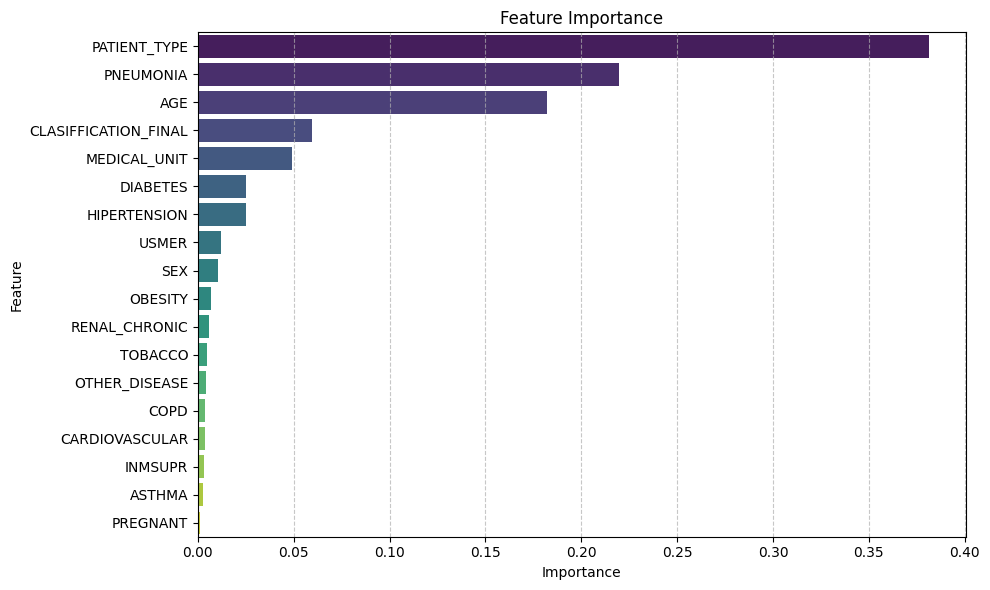

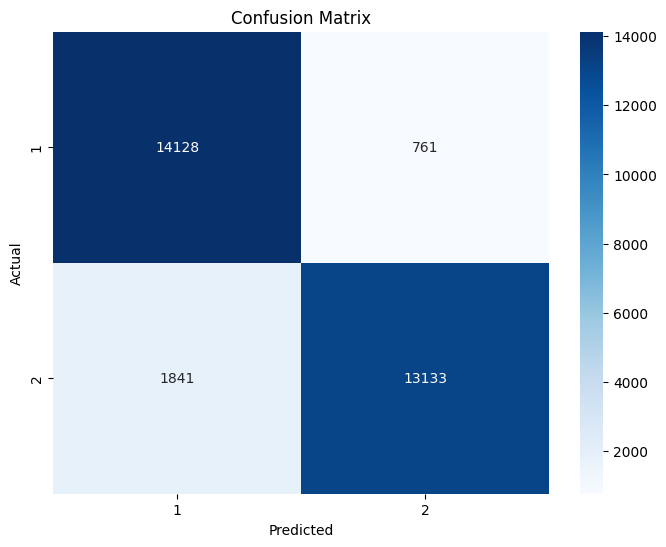

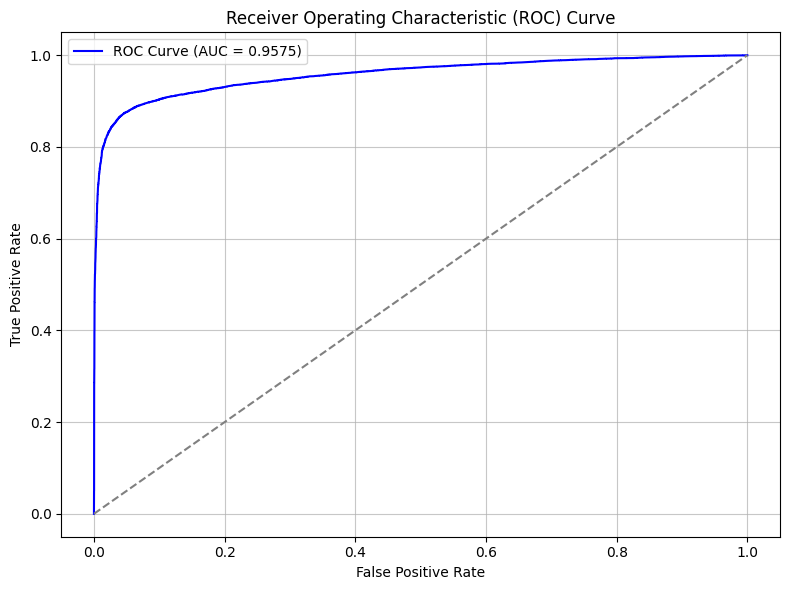

Accuracy: 0.9129
Precision: 0.9151
Recall: 0.9129
F1-Score: 0.9128
ROC-AUC: 0.9575
Cross-Validation F1-Score: 0.9130 ± 0.0009


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Function to train and evaluate Random Forest model
def RF_Model(train_x, test_x, train_y, test_y, feature_names, n_estimators=150, max_depth=17, min_samples_split=2, min_samples_leaf=1, random_state=42):
    # Train Random Forest model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=random_state,
        n_jobs=-1
    )
    model.fit(train_x, train_y)

    # Predictions
    predictions = model.predict(test_x)
    y_proba = model.predict_proba(test_x)[:, 1]  # Probability for positive class

    # Evaluation metrics
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions, average='weighted')
    recall = recall_score(test_y, predictions, average='weighted')
    f1 = f1_score(test_y, predictions, average='weighted')
    conf_matrix = confusion_matrix(test_y, predictions)

    # ROC-AUC Calculation
    fpr, tpr, thresholds = roc_curve(test_y, y_proba, pos_label=2)
    roc_auc = auc(fpr, tpr)

    # Classification report
    class_report = classification_report(test_y, predictions, target_names=['Died', 'Survived'])

    # Feature importance
    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Visualization: Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Visualization: Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Visualization: ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Output results
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Classification Report': class_report,
        'Feature Importance': importance_df
    }
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    return model, metrics

# Assuming train_x, test_x, train_y, test_y are already defined, and feature_names is a list of column names
feature_names = train_x.columns.tolist()
rf_model, rf_metrics = RF_Model(train_x, test_x, train_y, test_y, feature_names=feature_names)

# Perform Cross-Validation
cv_scores = cross_val_score(
    RandomForestClassifier(
        n_estimators=150, max_depth=17, min_samples_split=2, min_samples_leaf=1, random_state=42, n_jobs=-1
    ),
    train_x, train_y, cv=5, scoring='f1_weighted'
)
print(f"Cross-Validation F1-Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

In [58]:
# Classification Report
print(rf_metrics['Classification Report'])

              precision    recall  f1-score   support

        Died       0.88      0.95      0.92     14889
    Survived       0.95      0.88      0.91     14974

    accuracy                           0.91     29863
   macro avg       0.91      0.91      0.91     29863
weighted avg       0.92      0.91      0.91     29863



The Random Forest model achieves strong performance, with an accuracy of 91.29%, precision of 91.51%, recall of 91.29%, and F1-Score of 91.28%, alongside an impressive ROC-AUC of 0.9575, demonstrating reliable classification capability.

Key Insights:
1. Top Features: Patient Type, Pneumonia, and Age are identified as the most significant predictors, emphasizing their importance in determining patient outcomes.
2. Confusion Matrix:
  * True Positives: 14,128 cases correctly predicted as deaths.
  * True Negatives: 13,133 cases correctly predicted as survivals.
  * Minimal false positives (761) and false negatives (1,841), ensuring a balanced prediction for both classes.
3. Stability: Cross-Validation F1-Score of 91.30% ± 0.09% indicates robustness and generalizability across datasets.

These results confirm the Random Forest model’s effectiveness in predicting patient outcomes, supporting decision-making in healthcare interventions and public health strategies.v

In [37]:
# Save Random Forest model
import joblib
joblib.dump(rf_model, 'rf_model.pkl')
print("Random Forest model saved as 'rf_model.pkl'")

Random Forest model saved as 'rf_model.pkl'


## 2. Artificial Neural Network (ANN)

Artificial Neural Network (ANN) is a powerful deep learning model inspired by the human brain, adept at capturing complex nonlinear patterns. It is particularly well-suited for this medical dataset due to its flexibility in modeling intricate relationships and handling large-scale data.

Training Steps:

1.   Preprocessing: Features are normalized using StandardScaler, and class imbalance is addressed with RandomUnderSampler to ensure fair representation of minority classes.
2.   Model Configuration: The architecture consists of three hidden layers with ReLU activation, Dropout for regularization, and a softmax output layer for multi-class classification.
3.   Evaluation: Performance is assessed using metrics such as Accuracy, Precision, Recall, F1-Score, ROC-AUC, and the Confusion Matrix.

Purpose:

*   Predict patient survival or death based on medical attributes.
*   Identify and prioritize critical features influencing patient outcomes.
*   Enable healthcare providers to allocate resources efficiently and design targeted interventions.

This approach ensures accurate and interpretable predictions, empowering healthcare systems to make informed decisions for better outcomes.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2987/2987 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9029 - loss: 0.2711 - val_accuracy: 0.9108 - val_loss: 0.2449
Epoch 2/50
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9132 - loss: 0.2449 - val_accuracy: 0.9113 - val_loss: 0.2421
Epoch 3/50
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9122 - loss: 0.2457 - val_accuracy: 0.9112 - val_loss: 0.2435
Epoch 4/50
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9135 - loss: 0.2421 - val_accuracy: 0.9113 - val_loss: 0.2432
Epoch 5/50
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9129 - loss: 0.2416 - val_accuracy: 0.9115 - val_loss: 0.2422
Epoch 6/50
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9145 - loss: 0.2394 - val_accuracy: 0.9108 - val_loss: 0.2411
Epoch 7/50
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9155 - loss: 0.2387 - val_accuracy: 0.9115 - val_loss: 0.2421
Epoch 8/50
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9133 - loss: 0.2406 - val_accura

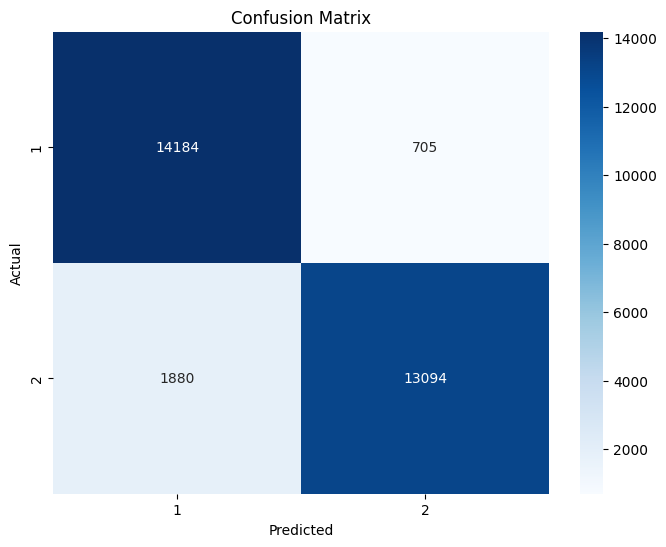

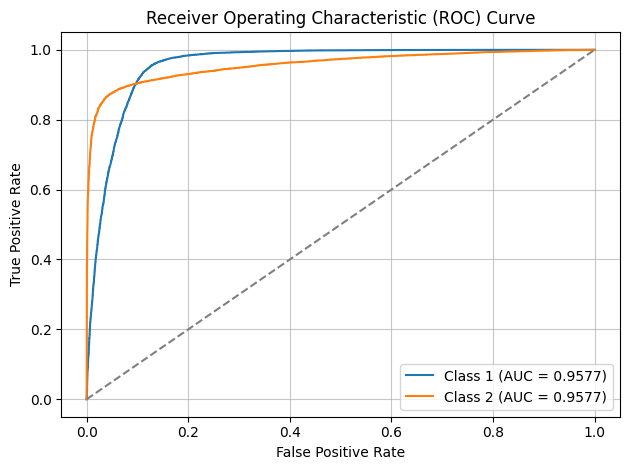

Accuracy: 0.9134
Precision: 0.9160
Recall: 0.9134
F1-Score: 0.9133
ROC-AUC: 0.9577


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder

# Function to train and evaluate ANN model
def ANN_Model(train_x, test_x, train_y, test_y, input_shape, epochs=50, batch_size=32, learning_rate=0.001):
    # Build the ANN model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')  # Output layer with 2 classes (Died, Survived)
    ])

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_x, train_y -1, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1) #Adjust train_y to start from 0

    # Predictions
    predictions = model.predict(test_x).argmax(axis=-1) + 1 #Adjust predictions to original labels
    decision_scores = model.predict(test_x)

    # One-hot encode test_y for ROC-AUC computation
    #The categories argument in OneHotEncoder should be [0, 1] instead of np.arange(3) because there are only two classes
    one_hot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
    #Reshape test_y for one-hot encoding and then subtract 1 to map the classes from {1, 2} to {0, 1}
    test_y_one_hot = one_hot_encoder.fit_transform(np.array(test_y-1).reshape(-1, 1))


    # Evaluation metrics
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions, average='weighted')
    recall = recall_score(test_y, predictions, average='weighted')
    f1 = f1_score(test_y, predictions, average='weighted')
    conf_matrix = confusion_matrix(test_y, predictions)

    # Compute ROC-AUC
    roc_auc = roc_auc_score(test_y_one_hot, decision_scores, multi_class='ovr')

    # Visualization: Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Visualization: ROC Curve
    #Number of classes should be 2 instead of 3
    for i in range(2):
        fpr, tpr, _ = roc_curve(test_y_one_hot[:, i], decision_scores[:, i])
        plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.4f})') #Adjusted class label

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Output results
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        #target_names should match the original labels (1 and 2)
        'Classification Report': classification_report(test_y, predictions, target_names=['Died', 'Survived'])
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Return the trained model and evaluation metrics
    return model, metrics, history

# Assuming train_x, test_x, train_y, and test_y are already defined
input_shape = train_x.shape[1]
ann_model, ann_metrics, ann_history = ANN_Model(train_x, test_x, train_y, test_y, input_shape=input_shape)

In [70]:
# Classification Report
print(ann_metrics['Classification Report'])

              precision    recall  f1-score   support

        Died       0.88      0.95      0.92     14889
    Survived       0.95      0.87      0.91     14974

    accuracy                           0.91     29863
   macro avg       0.92      0.91      0.91     29863
weighted avg       0.92      0.91      0.91     29863



The Artificial Neural Network (ANN) model showcases robust performance, achieving, with an accuracy of 91.34%, precision of 91.60%, recall of 91.34%, and F1-Score of 91.33%, alongside an impressive ROC-AUC of 0.9577, demonstrating reliable classification capability.

Key Insights:
1. Confusion Matrix:
  * True Positives: 14,184 patients correctly predicted as deceased.
  * True Negatives: 13,094 patients correctly predicted as survivors.
  * Minimal false positives (705) and false negatives (1,880) ensure reliable classification for both outcomes.
2. ROC Curve:
  * The ROC-AUC score of 0.9577 confirms excellent model discrimination for all classes.
  * This demonstrates the model's ability to distinguish between survival and death cases effectively.
3. Model Adaptability:
  * The ANN leverages deep learning to uncover intricate, nonlinear relationships in the dataset.
  * Regularization techniques (Dropout) ensure the model avoids overfitting, maintaining generalizability across datasets.

The ANN model is highly effective for predicting COVID-19 patient outcomes and provides actionable insights for healthcare prioritization. Its adaptability to large-scale data and nonlinear relationships makes it a valuable tool for clinical decision-making and resource allocation.

In [47]:
# Save ANN model
from tensorflow.keras.models import save_model
save_model(ann_model, 'ann_model.h5')
print("ANN model saved as 'ann_model.h5'")

ANN model saved as 'ann_model.h5'


## 3. Support Vector Machine (SVM)

Support Vector Machine (SVM) is a robust supervised learning algorithm ideal for binary classification tasks. It is particularly effective in handling complex decision boundaries through kernel functions and performs well on high-dimensional datasets.

Training Steps:

1.   Preprocessing: Input features are standardized using StandardScaler to ensure uniform scaling, and RandomUnderSampler is applied to address class imbalance, enhancing the model's ability to generalize.
2.   Model Configuration: Key hyperparameters such as the kernel function (e.g., rbf), penalty parameter (C), and gamma are fine-tuned to effectively capture nonlinear relationships in the data.
3.   Evaluation: The model’s performance is evaluated using metrics like Accuracy, Precision, Recall, F1-Score, Confusion Matrix, and ROC-AUC.

Purpose:

*   Predict COVID-19 patient survival outcomes based on medical features.
*   Utilize SVM's strength in modeling complex decision boundaries to accurately differentiate survival and death cases.
*   Provide reliable predictions to support healthcare resource planning and clinical decision-making.

This approach leverages SVM’s ability to handle imbalanced datasets and nonlinear separations, ensuring accurate and interpretable results for critical medical applications.

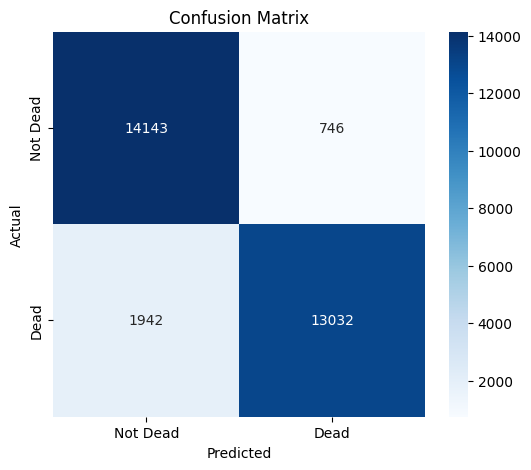

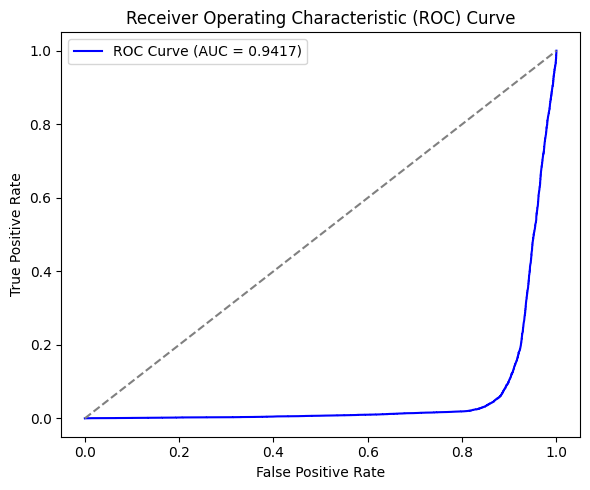

Accuracy: 0.9100
Precision: 0.8793
Recall: 0.9499
F1-Score: 0.9132
ROC-AUC: 0.9417


In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate SVM model
def SVM_Model(train_x, test_x, train_y, test_y, kernel='rbf', C=1.0, gamma='scale'):
    # Feature scaling
    scaler = StandardScaler()
    train_x_scaled = scaler.fit_transform(train_x)
    test_x_scaled = scaler.transform(test_x)

    # Initialize and train the SVM model
    svm_model = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
    svm_model.fit(train_x_scaled, train_y)

    # Make predictions and compute decision scores
    predictions = svm_model.predict(test_x_scaled)
    decision_scores = svm_model.decision_function(test_x_scaled)

    # Evaluation metrics
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions, average='binary')
    recall = recall_score(test_y, predictions, average='binary')
    f1 = f1_score(test_y, predictions, average='binary')
    roc_auc = roc_auc_score(test_y, decision_scores)
    conf_matrix = confusion_matrix(test_y, predictions)

    # Confusion Matrix Visualization
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Dead', 'Dead'], yticklabels=['Not Dead', 'Dead'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve Visualization
    fpr, tpr, thresholds = roc_curve(test_y, decision_scores, pos_label=1)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': conf_matrix
    }

    return svm_model, metrics, scaler

# Example usage
# Assuming train_x, test_x, train_y, test_y are already defined
svm_model, svm_metrics, scaler = SVM_Model(train_x, test_x, train_y, test_y)

# Print evaluation metrics
print(f"Accuracy: {svm_metrics['Accuracy']:.4f}")
print(f"Precision: {svm_metrics['Precision']:.4f}")
print(f"Recall: {svm_metrics['Recall']:.4f}")
print(f"F1-Score: {svm_metrics['F1-Score']:.4f}")
print(f"ROC-AUC: {svm_metrics['ROC-AUC']:.4f}")


The Support Vector Machine (SVM) model provides reliable predictions for COVID-19 patient outcomes with an accuracy of 91.00%, precision of 87.93%, recall of 94.99%, and F1-Score of 91.32%, alongside an impressive ROC-AUC of 94.17%, demonstrating reliable classification capability.

Key Insights:
1. Confusion Matrix:
  * True Positives: 13,032 patients correctly predicted as deceased.
  * True Negatives: 14,143 patients correctly predicted as survivors.
  * Minimal false positives (746) and false negatives (1,942) ensure reliable classification for both outcomes.
2. Precision and Recall:
  * The high recall (94.99%) indicates the model's effectiveness in identifying actual death cases, minimizing the risk of missing critical cases.
  * Precision of 87.93% highlights the balance between true positives and false positives, making the model suitable for healthcare decision-making.
3. Stability:
  * The ROC-AUC of 94.17% and balanced F1-Score of 91.32% emphasize the model's robustness and generalization capabilities, especially on imbalanced datasets.

The SVM model effectively captures nonlinear relationships in high-dimensional medical data, delivering consistent and accurate predictions. It supports actionable insights for healthcare interventions by classifying patient outcomes and prioritizing resources for high-risk cases.

In [52]:
# Save SVM model
import joblib
joblib.dump(svm_model, 'svm_model.pkl')
print("SVM model saved as 'svm_model.pkl'")

SVM model saved as 'svm_model.pkl'


# Model Evaluation

In [53]:
# Summarize these three model's confusion matric

import pandas as pd

data = {
    'Model': ['Random Forest', 'Artificial Neural Network', 'Support Vector Machine'],
    'Accuracy': [0.9129, 0.9134, 0.9100],
    'Precision': [0.9151, 0.9160, 0.8793],
    'Recall': [0.9129, 0.9134, 0.9499],
    'F1-Score': [0.9128, 0.9133, 0.9132],
    'ROC-AUC': [0.9575, 0.9577, 0.9417],
    'True Positives': [14128, 14184, 13032],
    'True Negatives': [13133, 13094, 14143],
    'False Positives': [761, 705, 746],
    'False Negatives': [1841, 1880, 1942]
}

df = pd.DataFrame(data)
df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,True Positives,True Negatives,False Positives,False Negatives
0,Random Forest,0.9129,0.9151,0.9129,0.9128,0.9575,14128,13133,761,1841
1,Artificial Neural Network,0.9134,0.9160,0.9134,0.9133,0.9577,14184,13094,705,1880
2,Support Vector Machine,0.9100,0.8793,0.9499,0.9132,0.9417,13032,14143,746,1942


Model Comparison and Selection
Selected Model: Artificial Neural Network (ANN)

*   Performance: ANN achieves the highest accuracy (91.34%), precision (91.60%), recall (91.34%), and F1-score (91.33%), with a strong ROC-AUC of 0.9577.
*   Strengths: Best balance between identifying true positives (high recall) and minimizing false positives (high precision). Ideal for scenarios requiring precise patient risk prediction and efficient resource allocation.

Alternative Model: Random Forest

*   Performance: Comparable accuracy (91.29%) and ROC-AUC (0.9575), slightly lower precision and recall than ANN.
*   Strengths: Provides feature importance insights (e.g., Patient Type and Pneumonia), making it suitable for decision-making scenarios requiring interpretability.

Excluded Model: Support Vector Machine (SVM)

*   Performance: Lower ROC-AUC (0.9417) and inferior recall compared to ANN and Random Forest.
*   Limitations: Higher false positives and reduced ability to differentiate between survival and death cases.

Conclusion:
ANN is the optimal model due to its superior predictive performance and balance across metrics, while Random Forest is a strong alternative for interpretability-focused use cases.

# Members’ Contribution

Group Member

1. GE ZHIXING (23101507): Explore and Build Artificial Neural Network Model and Evaluation
2. WU YIBIN (23075339): Explore and Build Random Forest Model and Evaluation
3. YANG QIULIN (22106608): Model Tuning, Prepare Presentation and Q&A session
4. WONG YITING (S2152880): Data Understanding, Data Preparation, Data Visualization, Data Preprocessing, Tuning Model, Integrate All coding file
5. ZOU JINGYI (23103507): Explore and Build Support Vector Machines Model and Evaluation